# Lab Five: Wide and Deep Networks


Arely Alcantara, Emily Fashenpour

## 1. Preparation and Overview

### 1.1 Business Case

The data set we selected is titled "Stack Overflow 2018 Developer Survey". It is a yearly survey collected by Stack Overflow where the developer community is asked questions that range from education, job satisfaction, views on AI, adverstising, ethics, and even stack overflow itself, and general sleeping and eating habits. There were more than 100,000 responses to the survey but there were only 67,441 responses that were completed and did not contain personally identifying information. 

There are two .csv files that below to this dataset. The first file (survey_results_public.csv) contains all the responses to the questions asked in the survey and the second file (survey_results_schema.csv) contains the question the goes with each column in the first file. For example, the column 'Hobby' contains all the responses to the question 'Do you code as a hobby?'.

There are several job seach companies, like Indeed and ZipRecruiter, who could use data from a survey like this to help find more customers. Meaning they could take this data, try to determine which types of features correlate to a developer currently looking for a job, and better understand who they should be connecting with to say 'Hey, we think you might be looking for a job, and here are some jobs that you may be interested in!'.

We believe that in order for companies like Indeed to find our model useful, we need to be precise more than half of the time. That just means that our model needs to be able to predict and be right more than half of time so that it would be better than just guessing.

* Dataset URL: https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey#survey_results_public.csv
* Classification task: Classify a developer's job search status as either not interested in new job opportunites, not actively searching but open to hearing about job opportunites, or actively searching for new job opportunities.

### 1.2 Data Preparation

There are a total of 129 features in the dataset. To help with time and complexity of building the models to classify whether a developer is currently searching for a job, we decided to drop a lot of the features for a several reasons. (1) There were a couple columns that we felt would have no affect on the model and the prediction task including 'Respondent', which was just a unique number for each developer who completed the survey and 'IDE' which contained all the responses to which IDEs the developer used. (2) There were a lot of questions that asked the developer to rank certain values in order of importance, like prefered way to be contacted at work, how they felt about a particular advertisment, or how they thought stack overflow could improve. We felt that these features would not have an affect on the model/prediction task. (3) __HERE__

What is left after dropping many of the columns are the features we felt would have an impact on the prediction task. Features like 'JobSatisfaction', 'Age', and 'Dependents'. If developers are unhappy with their current job, are they more likely to be looking for a job and do the number of dependents and age also affect whether they are looking for a new job?

Since we are trying to predict whether a developer is currently searching for a job, we are also going to drop all the rows in 'JobSearchStatus' that have a null value or 'nan'.

In [1]:
import pandas as pd
import numpy as np


#read in the csv files
survey = pd.read_csv('stack-overflow-survey/survey_results_public.csv')

#drop colums that are not needed
drop = ['Respondent', 'SurveyEasy', 'SurveyTooLong', 'AssessJob1', 'AssessJob2', 'AssessJob3',
        'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10',
        'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5',
        'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
        'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 
        'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2',
        'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6',
        'JobEmailPriorities7', 'Currency', 'Salary', 'CurrencySymbol', 'IDE', 'OperatingSystem', 'NumberMonitors',
        'AdBlocker', 'AdBlockerDisable', 'AdBlockerReasons', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 
        'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 
        'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6','AdsPriorities7', 'AIDangerous', 
        'AIInteresting', 'AIResponsible', 'AIFuture', 'EthicsChoice', 'EthicsReport','EthicsResponsible',
        'EthicalImplications', 'StackOverflowRecommend', 'StackOverflowVisit', 'StackOverflowHasAccount', 
        'StackOverflowParticipate', 'StackOverflowDevStory', 'StackOverflowJobsRecommend', 'StackOverflowConsiderMember',
        'HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 
        'ErgonomicDevices', 'LanguageWorkedWith' , 'LanguageDesireNextYear', 'DatabaseWorkedWith',
        'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 
        'FrameworkDesireNextYear', 'Methodology', 'VersionControl', 'CommunicationTools', 'TimeFullyProductive',
        'SelfTaughtTypes', 'TimeAfterBootcamp', 'CheckInCode']# ['SurveyEasy', 'SurveyTooLong']

#dropping all col
for d in drop:
    survey.drop([d], axis=1, inplace=True)

#dropping all null values in the 'JobSearchStaus' column
survey = survey.dropna(subset=['JobSearchStatus', 'CareerSatisfaction', 'Employment', 'JobSatisfaction', 'HopeFiveYears', 'LastNewJob', 'UpdateCV', 'ConvertedSalary'])

survey.head()

/Users/emilyfashenpour/anaconda3/envs/maclearn/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,HoursOutside,SkipMeals,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS
1,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,30 - 59 minutes,Never,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN
4,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,1 - 2 hours,Never,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN
5,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,6-8 years,...,30 - 59 minutes,1 - 2 times per week,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN
6,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,9-11 years,...,Less than 30 minutes,1 - 2 times per week,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No
8,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,...,Less than 30 minutes,1 - 2 times per week,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No


In [2]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43346 entries, 1 to 80449
Data columns (total 37 columns):
Hobby                 43346 non-null object
OpenSource            43346 non-null object
Country               43346 non-null object
Student               43046 non-null object
Employment            43346 non-null object
FormalEducation       42785 non-null object
UndergradMajor        39218 non-null object
CompanySize           39004 non-null object
DevType               43100 non-null object
YearsCoding           43332 non-null object
YearsCodingProf       43346 non-null object
JobSatisfaction       43346 non-null object
CareerSatisfaction    43346 non-null object
HopeFiveYears         43346 non-null object
JobSearchStatus       43346 non-null object
LastNewJob            43346 non-null object
UpdateCV              43346 non-null object
SalaryType            37760 non-null object
ConvertedSalary       43346 non-null float64
EducationTypes        41849 non-null object
HackathonR

Below is a table of what each column in our dataset means - in terms of the questions that the survey takers were asked. We merged both csv files and this is just to show what each attribute is as the column names might not be too descriptive.

In [3]:
data_des = pd.DataFrame()
data_des['Column'] = survey.columns
survey_schema = pd.read_csv('stack-overflow-survey/survey_results_schema.csv')
data_des = pd.merge(data_des, survey_schema, on=['Column'], how="inner", indicator=False)
pd.options.display.max_colwidth = 150
data_des

,Column,QuestionText
0,Hobby,Do you code as a hobby?
1,OpenSource,Do you contribute to open source projects?
2,Country,In which country do you currently reside?
3,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
4,Employment,Which of the following best describes your current employment status?
5,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
6,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
7,CompanySize,Approximately how many people are employed by the company or organization you work for?
8,DevType,Which of the following describe you? Please select all that apply.
9,YearsCoding,"Including any education, for how many years have you been coding?"


The majority of columns contain categorical data that need to be mapped to an interger value. For example, the 'JobSearchStatus' has three unique values: 'I am not interested in new job opportunities','I’m not actively looking, but I am open to new opportunities', and 'I am actively looking for a job' which are mapped in integer values 0, 1, and 2. The same process if repeated for the other columns.

In [4]:
#map categorical data to integer values
survey['JobSearchStatus'] = survey['JobSearchStatus'].map({
    'I am not interested in new job opportunities': 0,
    'I’m not actively looking, but I am open to new opportunities': 1,
    'I am actively looking for a job': 1
})

A = pd.Series(survey['JobSearchStatus']).unique()
for a in A:
    print('Unique:  ',a)

Unique:   1
Unique:   0


We have a lot of categorical features that have varying degrees of agree/disagree, yes or no questions, as well as empty responses so we did our best to one hot encode each categorical variable and replace NaN's with a neutral value.

In [5]:
# #map categorical data to integer values
survey['Hobby'] = survey['Hobby'].map({
    'No': 0,
    'Yes': 1
})

survey['OpenSource'] = survey['OpenSource'].map({
    'No': 0,
    'Yes': 1
})

survey['Student'] = survey['Student'].map({
    'No': 0,
    'Yes, part-time': 1,
    'Yes, full-time': 2
})
survey['Student'] = survey['Student'].fillna(0)
survey['Student'] = survey['Student'].astype(int)

survey['Employment'] = survey['Employment'].map({
    'Independent contractor, freelancer, or self-employed': 0,
    'Employed part-time': 1,
    'Employed full-time': 2
})
survey['Employment'] = survey['Employment'].astype(int)

survey['JobSatisfaction'] = survey['JobSatisfaction'].map({
    'Extremely dissatisfied': 0,
    'Moderately dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Moderately satisfied': 5,
    'Extremely satisfied': 6
})
survey['JobSatisfaction'] = survey['JobSatisfaction'].astype(int)

survey['CareerSatisfaction'] = survey['CareerSatisfaction'].map({
    'Extremely dissatisfied': 0,
    'Moderately dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Moderately satisfied': 5,
    'Extremely satisfied': 6
})
survey['CareerSatisfaction'] = survey['CareerSatisfaction'].astype(int)

survey['HopeFiveYears'] = survey['HopeFiveYears'].map({
    "Working as a founder or co-founder of my own company": 0,
    "Working in a different or more specialized technical role than the one I'm in now": 1,
    "Doing the same work": 2,
    "Working in a career completely unrelated to software development": 3,
    "Working as a product manager or project manager": 4,
    "Working as an engineering manager or other functional manager": 5,
    "Retirement": 6
})
survey['HopeFiveYears'] = survey['HopeFiveYears'].astype(int)

survey['LastNewJob'] = survey['LastNewJob'].map({
    "I've never had a job": 0,
    "Less than a year ago": 1,
    "Between 1 and 2 years ago": 2,
    "Between 2 and 4 years ago": 3,
    "More than 4 years ago": 4
})
survey['LastNewJob'] = survey['LastNewJob'].astype(int)

survey['UpdateCV'] = survey['UpdateCV'].map({
    "My job status or other personal status changed": 0,
    "I saw an employer’s advertisement": 1,
    "A recruiter contacted me": 2,
    "I did not receive an expected change in compensation": 3,
    "A friend told me about a job opportunity": 4,
    "I had a negative experience or interaction at work": 5,
    "I received bad news about the future of my company or department": 6,
    "I received negative feedback on my job performance": 7
})
survey['UpdateCV'] = survey['UpdateCV'].astype(int)

survey['AgreeDisagree1'] = survey['AgreeDisagree1'].map({
    'Neither Agree nor Disagree': 0,
    'Strongly disagree': 1,
    'Disagree': 2,
    'Agree': 3,
    'Strongly agree': 4
})
survey['AgreeDisagree1'] = survey['AgreeDisagree1'].fillna(0)
survey['AgreeDisagree1'] = survey['AgreeDisagree1'].astype(int)

survey['AgreeDisagree2'] = survey['AgreeDisagree2'].map({
    'Neither Agree nor Disagree': 0,
    'Strongly disagree': 1,
    'Disagree': 2,
    'Agree': 3,
    'Strongly agree': 4
})
survey['AgreeDisagree2'] = survey['AgreeDisagree2'].fillna(0)
survey['AgreeDisagree2'] = survey['AgreeDisagree2'].astype(int)

survey['AgreeDisagree3'] = survey['AgreeDisagree3'].map({
    'Neither Agree nor Disagree': 0,
    'Strongly disagree': 1,
    'Disagree': 2,
    'Agree': 3,
    'Strongly agree': 4
})
survey['AgreeDisagree3'] = survey['AgreeDisagree3'].fillna(0)
survey['AgreeDisagree3'] = survey['AgreeDisagree3'].astype(int)

survey['StackOverflowJobs'] = survey['StackOverflowJobs'].map({
    "No, I didn't know that Stack Overflow had a jobs board": 0,
    'No, I knew that Stack Overflow had a jobs board but have never used or visited it': 1,
    'Yes': 2
})
survey['StackOverflowJobs'] = survey['StackOverflowJobs'].fillna(0)
survey['StackOverflowJobs'] = survey['StackOverflowJobs'].astype(int)

survey['SkipMeals'] = survey['SkipMeals'].map({
    'Never': 0,
    '1 - 2 times per week': 1,
    '3 - 4 times per week': 2,
    'Daily or almost every day': 3
})
survey['SkipMeals'] = survey['SkipMeals'].fillna(0)
survey['SkipMeals'] = survey['SkipMeals'].astype(int)

survey['Exercise'] = survey['Exercise'].map({
    'Never': 0,
    '1 - 2 times per week': 1,
    '3 - 4 times per week': 2,
    'Daily or almost every day': 3
})
survey['Exercise'] = survey['Exercise'].fillna(0)
survey['Exercise'] = survey['Exercise'].astype(int)

survey['EducationParents'] = survey['EducationParents'].map({
    'They never completed any formal education': 0,
    'Primary/elementary school': 1,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
    'Some college/university study without earning a degree': 3,
    'Associate degree': 4,
    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 6,
    'Professional degree (JD, MD, etc.)': 7,
    'Other doctoral degree (Ph.D, Ed.D., etc.)': 8
})
survey['EducationParents'] = survey['EducationParents'].fillna(0)
survey['EducationParents'] = survey['EducationParents'].astype(int)

survey['Dependents'] = survey['Dependents'].map({
    'No': 0,
    'Yes': 1
})
survey['Dependents'] = survey['Dependents'].fillna(0)
survey['Dependents'] = survey['Dependents'].astype(int)

survey['MilitaryUS'] = survey['MilitaryUS'].map({
    'No': 0,
    'Yes': 1
})
survey['MilitaryUS'] = survey['MilitaryUS'].fillna(0)
survey['MilitaryUS'] = survey['MilitaryUS'].astype(int)

In [6]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43346 entries, 1 to 80449
Data columns (total 37 columns):
Hobby                 43346 non-null int64
OpenSource            43346 non-null int64
Country               43346 non-null object
Student               43346 non-null int64
Employment            43346 non-null int64
FormalEducation       42785 non-null object
UndergradMajor        39218 non-null object
CompanySize           39004 non-null object
DevType               43100 non-null object
YearsCoding           43332 non-null object
YearsCodingProf       43346 non-null object
JobSatisfaction       43346 non-null int64
CareerSatisfaction    43346 non-null int64
HopeFiveYears         43346 non-null int64
JobSearchStatus       43346 non-null int64
LastNewJob            43346 non-null int64
UpdateCV              43346 non-null int64
SalaryType            37760 non-null object
ConvertedSalary       43346 non-null float64
EducationTypes        41849 non-null object
HackathonReasons    

### 1.3 Cross Product Features

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

categorical_headers = ['Hobby', 'OpenSource', 'Student', 
                       'Employment', 'JobSatisfaction', 
                       'CareerSatisfaction', 'HopeFiveYears', 
                       'LastNewJob', 'UpdateCV', 'AgreeDisagree1', 
                       'AgreeDisagree2', 'AgreeDisagree3', 
                       'StackOverflowJobs', 'SkipMeals','Exercise',
                       'EducationParents', 'Dependents','MilitaryUS']
numeric_headers = ['ConvertedSalary']

encoders=dict()
df_train=survey
df_test=survey

for col in categorical_headers:
    encoders[col] = LabelEncoder() # save the encoder
    df_train[col+'_int'] = encoders[col].fit_transform(df_train[col])
    df_test[col+'_int'] = encoders[col].fit_transform(df_test[col])
    
for col in numeric_headers:
    df_train[col] = df_train[col].astype(np.float)
    df_test[col] = df_test[col].astype(np.float)
    
    ss = StandardScaler()
    df_train[col] = ss.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = ss.fit_transform(df_test[col].values.reshape(-1, 1))
    
df_train.head()

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,UpdateCV_int,AgreeDisagree1_int,AgreeDisagree2_int,AgreeDisagree3_int,StackOverflowJobs_int,SkipMeals_int,Exercise_int,EducationParents_int,Dependents_int,MilitaryUS_int
1,1,1,United Kingdom,0,2,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,30 or more years,...,1,3,3,0,2,0,3,5,1,0
4,1,0,South Africa,1,2,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,6-8 years,...,0,4,3,1,1,0,2,3,1,0
5,1,0,United Kingdom,0,2,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",10 to 19 employees,Back-end developer;Database administrator;Front-end developer;Full-stack developer,6-8 years,...,3,2,0,1,2,1,1,2,0,0
6,1,1,United States,0,2,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Back-end developer;Front-end developer;Full-stack developer,9-11 years,...,0,2,3,1,2,1,0,6,0,0
8,1,1,United States,0,2,Some college/university study without earning a degree,"Fine arts or performing arts (ex. graphic design, music, studio art)",100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Database administrator;DevOps specialist;Engineering manager;Full-s...",30 or more years,...,0,4,1,1,2,1,0,3,1,0


In [8]:
crossed_columns = [['Student', 'Hobby', 'Employment'],  
#                   ['JobSatisfaction', 'SkipMeals', 'AgreeDisagree1'],
                  ['CareerSatisfaction', 'HopeFiveYears'], 
#                   ['UpdateCV', 'AgreeDisagree3', 'JobSatisfaction'],
                  ['Dependents', 'Employment'],
                  ['LastNewJob', 'JobSatisfaction']]

We will be creating groups of crossed columns in our data so that our model is able to memorize and pick up on certain patterns. We hope to train our model with these groups and see if there's any relationships that cause someone to actively search for a job and what those motivations might be. We understand that there might be outside factors that could also affect someone's desire for a new job, but we feel that the stackoverflow survey really captured the essence of a person and we picked the questions that are most relevant to us. As far as the groups go, we decided to look at Student and Country - so will a person being in school in Europe or any country in that matter, be interested in a job? We will also look at Hobby and Employment - so, does an individual code for fun and are they currently employed? The next group is JobSatisfaction, SkipMeals, AgreeDisagree1 - which deals with how satisfied or unsatisfied an individual is with their current job, how many meals they skip a week, and how well they get along with their peers at work (overall, reasons that could cause one to want to leave their job and search for a new one.). And lastly, we look at how satisfied an individual is with their career, where they see themselves in 5 years, if they have updated their resume recently, how they feel in relation to their peers in terms of efficiency, and how satisfied they are at work. We feel that by having these groups, we will have a better understanding of what could cause someone to want to look for a new job, or not want to get a new job since they're employed.

### 1.4 Evaluation Metrics

Jobs are extremely important and we want to help people get connected with companies if they're looking for a job, and also not reach out or promote jobs with people who are employed and not interested in a new job.. because that would be awkward. Our goal is to be able to predict whether a person is looking for a job, or not, or maybe just checking out what's out there - whatever it is, we want to help. In order to do that, we need to make sure that our model is precise - meaning that we're able to get close values, being consistent is key for us. But we also want to be accurate in predicting so getting the correct predictions each time. We will be using both accuracy and precision to measure the performance of our model in predicting a person's job search status.

### 1.5 Dividing Data into Training and Testing

Since we have such a big dataset, we have decided to stick with an 80/20 split. We will use 80% of the dataset to train our model and use the remaining 20% to test how well our model performs. Using any types of folding or shuffling would be terribly slow and almost unnecessary in our case, wo we will just split the dataset to get an idea of what job hunters look like versus full time students or happily employed people.

In [9]:
from sklearn.model_selection import train_test_split

# split dataframe into train and test sets
train, test = train_test_split(df_train,test_size=0.2)
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test)

y_train=df_train['JobSearchStatus'].values.astype(np.int)
y_test=df_test['JobSearchStatus'].values.astype(np.int)

## 2. Modeling

In [10]:
from sklearn import metrics as mt
import keras
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, concatenate
from keras.models import Model
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pyd

Using TensorFlow backend.


In [11]:
#custom precision metric function - from keras
from keras import backend as K
def precision(y_true, y_pred):
    true_positives= K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

### 2.1 Model 1

In the deep side of the network in our first model, we will be using 3 layers. In the first layer, we will have 128 neurons, and in the second layer, we will have 64 neurons, and in the third layer, we will have 16 neurons. The activation function taht will be used is ReLu, the loss function will be Mean Squared Error, and the optimizer will be Stochastic Gradient Descent.

In [12]:
# Layers = 3, Neurons = 128, 64, 16
# Activation = ReLu, Loss = Mean Squared Error, Optimizer = sdg 

categorical_headers_ints = [x+'_int' for x in categorical_headers]
X_train_num =  df_train[numeric_headers].values
X_test_num = df_test[numeric_headers].values

feature_columns = categorical_headers_ints+numeric_headers
X_train =  ss.fit_transform(df_train[feature_columns].values).astype(np.float32)
X_test =  ss.transform(df_test[feature_columns].values).astype(np.float32)

embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []

for cols in crossed_columns:
    # encode crossed columns as ints for the embedding
    enc = LabelEncoder()
    
    # create crossed labels
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(str(v) for v in x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(str(v) for v in x), axis=1)
    
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name = '_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
# merge the branches together
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1,activation='sigmoid',name='wide_combined')(wide_branch)

# reset this input branch
all_deep_branch_outputs = []
# add in the embeddings
for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
all_inputs.append(Input(shape=(X_train_num.shape[1],),
                        sparse=False,
                        name='numeric_data'))

x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append( x )

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=128,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=64,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=16,activation='relu', name='deep3')(deep_branch)
    
final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

Instructions for updating:
Colocations handled automatically by placer.


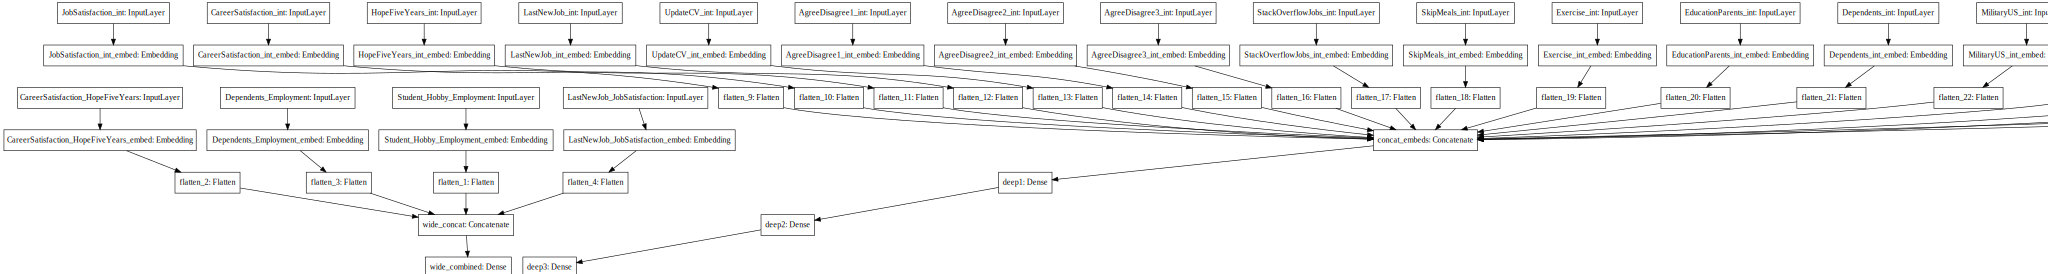

In [13]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
%%time
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy', precision])

model.fit(X_ints_train + [X_train_num],
        y_train, epochs=10, batch_size=32, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
34676/34676 [==============================] - 2s 64us/step - loss: 0.1976 - accuracy: 0.7366 - precision: 0.7365
Epoch 2/10
34676/34676 [==============================] - 2s 57us/step - loss: 0.1924 - accuracy: 0.7366 - precision: 0.7366
Epoch 3/10
34676/34676 [==============================] - 2s 60us/step - loss: 0.1905 - accuracy: 0.7366 - precision: 0.7365
Epoch 4/10
34676/34676 [==============================] - 2s 59us/step - loss: 0.1852 - accuracy: 0.7366 - precision: 0.7365
Epoch 5/10
34676/34676 [==============================] - 2s 59us/step - loss: 0.1744 - accuracy: 0.7366 - precision: 0.7366
Epoch 6/10
34676/34676 [==============================] - 2s 56us/step - loss: 0.1656 - accuracy: 0.7565 - precision: 0.7672
Epoch 7/10
34676/34676 [==============================] - 2s 55us/step - loss: 0.1619 - accuracy: 0.7693 - precision: 0.7942
Epoch 8/10
34676/34676 [==============================] - 2s 56us/step - loss

Run on test data - aka all the data that the model has not seen yet

In [15]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat))

print(mt.accuracy_score(y_test,yhat))

[[ 725 1510]
 [ 412 6023]]
0.778316032295271


### 2.2 Model 2

In the deep side of the network in our second model, we will be using 3 layers, and will be very similar to our first model except we will be using dropout to help prevent overfitting to the training data. In the first layer, we will have 128 neurons, and in the second layer, we will have 64 neurons, and in the third layer, we will have 16 neurons. Between the first two layers, 15% of the neurons will not be updated and between the last two layers, 30% of the neurons will not be updated. The activation function that will be used is ReLu, the loss function will be Mean Squared Error, and the optimizer will be Stochastic Gradient Descent.

In [16]:
# Layers = 3, Neurons = 128, 64, 16, Dropout = 15%, 30% 
# Activation = ReLu, Loss = Mean Squared Error, Optimizer = sdg 



In [18]:
model.compile(optimizer='sdg', 
              loss='mean_squared_error', 
              metrics=['accuracy', precision])

Run on test data - aka all the data that the model has not seen yet

### 2.3 Model 3

In the deep side of the network on our third model, we will be using 5 layers. We will also be using dropout between layers to prevent overfitting. In the first layer, we will have 128 neurons, in the second layer, we will have 64 neurons, in the third layer, we will have 32 neurons, in the fourth layer, we will have 16 neurons, and in the fifth layer, we will have 8 neurons. Between the first two layers, 10% of the neurons will not be updated, between the next two layers, 20% of the neurons will not be updated, then 30% will not be updated, and between the last two layer, 40% of the neurons will not be updated. The activation function that will be used is the Sigmoid, the loss function will be Categorical Cross Entropy, and the optimizer will be Stochastic Gradient Descent.

In [ ]:
# Layers = 5, Neurons = 128, 64, 32, 16, 8, Dropout = 10%, 20%, 30%, 40% 
# Activation = Sigmoid, Loss = Categorical Cross Entropy, Optimizer = sdg 



In [ ]:
model.compile(optimizer='sdg', 
              loss='categorical_cross_entropy', 
              metrics=['accuracy', precision])

Run on test data - aka all the data that the model has not seen yet

### 2.4 Model 4

In the deep side of the network on our fourth model, we will be using 5 layers. We will also be using dropout between layers to prevent overfitting. In the first layer, we will have 128 neurons, in the second layer, we will have 64 neurons, in the third layer, we will have 32 neurons, in the fourth layer, we will have 16 neurons, and in the fifth layer, we will have 8 neurons. Between the first two layers, 10% of the neurons will not be updated, between the next two layers, 20% of the neurons will not be updated, then 30% will not be updated, and between the last two layer, 40% of the neurons will not be updated. The activation function that will be used is ReLu, the loss function will be Mean Squared Error, and the optimizer will be Adagrad.

In [ ]:
# Layers = 5, Neurons = 128, 64, 32, 16, 8, Dropout = 10%, 20%, 30%, 40% 
# Activation = ReLu, Loss = Mean Squared Error, Optimizer = adagrad


In [ ]:
model.compile(optimizer='adagrad', 
              loss='mean_squared_error', 
              metrics=['accuracy', precision])

Run on test data - aka all the data that the model has not seen yet

### 2.5 Comparing Our Best Model to a Standard MultiLayer Perceptron

Comparing standard MLP to our best model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X_train = train
y_train = train['JobSearchStatus']
X_test = test
y_test = test['JobSearchStatus']

mlpModel = MLPClassifier(hidden_layer_sizes=(128,), 
                    activation='relu', 
                    solver='sgd', 
                    learning_rate_init=0.001,
                    max_iter=100,
                    random_state=1)

mlpModel.fit(X_train,y_train)
yhat = mlpModel.predict(X_test)
print('Validation Acc:', accuracy_score(yhat,y_test))

#### ROC Graph

## 3. Additional Analysis

### 3.1 Dimensionality Reduction and Visualization

## References
https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey#survey_results_public.csv